In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta
import calendar

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [11]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
# Using the station id from the previous query.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

### Exploratory Climate Analysis for June

[('2017-06-01', 0.0), ('2017-06-02', 0.0), ('2017-06-03', 0.02), ('2017-06-04', 0.0), ('2017-06-05', 0.0), ('2017-06-06', 0.0), ('2017-06-07', 0.0), ('2017-06-08', 0.0), ('2017-06-09', 0.0), ('2017-06-10', 0.04), ('2017-06-11', 0.08), ('2017-06-12', 0.02), ('2017-06-13', 0.0), ('2017-06-14', 0.0), ('2017-06-15', 0.0), ('2017-06-16', 0.0), ('2017-06-17', 0.0), ('2017-06-18', 0.05), ('2017-06-19', 0.0), ('2017-06-20', 0.02), ('2017-06-21', 0.0), ('2017-06-22', 0.0), ('2017-06-23', 0.0), ('2017-06-24', 0.06), ('2017-06-25', 0.0), ('2017-06-26', 0.0), ('2017-06-27', 0.0), ('2017-06-28', 0.0), ('2017-06-29', 0.0), ('2017-06-30', 0.08), ('2017-06-01', 0.03), ('2017-06-02', 0.1), ('2017-06-03', 0.2), ('2017-06-04', 0.15), ('2017-06-05', 0.0), ('2017-06-06', 0.0), ('2017-06-07', 0.0), ('2017-06-08', 0.02), ('2017-06-09', 0.02), ('2017-06-10', 0.21), ('2017-06-11', 0.24), ('2017-06-12', 0.19), ('2017-06-13', 0.36), ('2017-06-14', 0.27), ('2017-06-15', 0.17), ('2017-06-16', 0.02), ('2017-06-17',

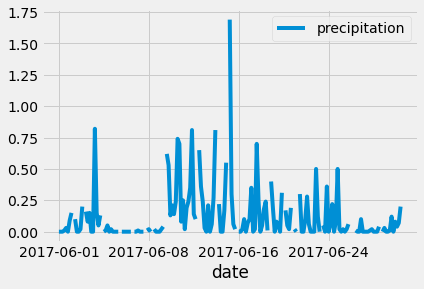

In [13]:
 
# calc month of june 2017
# https://stackoverflow.com/questions/11616260/how-to-get-all-objects-with-a-date-that-fall-in-a-specific-month-sqlalchemy/31641488
year = 2017
month = 6
num_days = calendar.monthrange(year, month)[1]
start_date = dt.date(year, month, 1)
end_date = dt.date(year, month, num_days)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
june_df = pd.DataFrame(results, columns=['date', 'precipitation'])
june_df.set_index(june_df['date'], inplace=True)
# Sort the dataframe by date
june_df = june_df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
june_df.plot()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
june_df.describe()

,precipitation
count,171.000000
mean,0.120000
std,0.217726
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


In [15]:
Jresults = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= start_date, Measurement.date <= end_date).all()
# Query June 2017
print(Jresults)

[(80.0,), (76.0,), (76.0,), (77.0,), (75.0,), (75.0,), (75.0,), (75.0,), (72.0,), (74.0,), (74.0,), (74.0,), (76.0,), (74.0,), (75.0,), (73.0,), (79.0,), (75.0,), (72.0,), (72.0,), (74.0,), (72.0,), (72.0,), (77.0,), (71.0,), (73.0,), (76.0,), (77.0,), (76.0,), (76.0,)]


In [17]:
junetemp_df = pd.DataFrame(Jresults, columns=['tobs'])
print(junetemp_df)
junetemp_df.describe()

    tobs
0   80.0
1   76.0
2   76.0
3   77.0
4   75.0
5   75.0
6   75.0
7   75.0
8   72.0
9   74.0
10  74.0
11  74.0
12  76.0
13  74.0
14  75.0
15  73.0
16  79.0
17  75.0
18  72.0
19  72.0
20  74.0
21  72.0
22  72.0
23  77.0
24  71.0
25  73.0
26  76.0
27  77.0
28  76.0
29  76.0


,tobs
count,30.000000
mean,74.766667
std,2.128353
min,71.000000
25%,73.250000
50%,75.000000
75%,76.000000
max,80.000000


### Exploratory Climate Analysis for December

[('2016-12-01', 0.12), ('2016-12-02', 0.03), ('2016-12-03', 0.0), ('2016-12-04', 0.03), ('2016-12-05', 0.43), ('2016-12-06', 0.02), ('2016-12-07', 0.0), ('2016-12-08', 0.03), ('2016-12-09', 0.52), ('2016-12-10', 0.05), ('2016-12-11', 0.04), ('2016-12-12', 0.01), ('2016-12-13', 0.05), ('2016-12-14', 0.03), ('2016-12-15', 0.0), ('2016-12-16', 0.0), ('2016-12-17', 0.01), ('2016-12-18', 0.13), ('2016-12-19', 0.01), ('2016-12-20', 0.0), ('2016-12-21', 0.0), ('2016-12-22', 0.01), ('2016-12-23', 0.01), ('2016-12-24', 0.01), ('2016-12-25', 0.0), ('2016-12-26', 0.02), ('2016-12-27', 0.0), ('2016-12-28', 0.02), ('2016-12-29', 0.04), ('2016-12-30', 0.12), ('2016-12-31', 0.01), ('2016-12-01', 0.33), ('2016-12-02', 0.3), ('2016-12-03', 0.04), ('2016-12-04', 0.1), ('2016-12-05', 0.34), ('2016-12-06', 0.02), ('2016-12-07', 0.17), ('2016-12-08', 0.03), ('2016-12-09', 0.34), ('2016-12-10', 0.02), ('2016-12-11', 0.02), ('2016-12-12', 0.01), ('2016-12-13', 0.1), ('2016-12-14', 0.05), ('2016-12-15', 0.02)

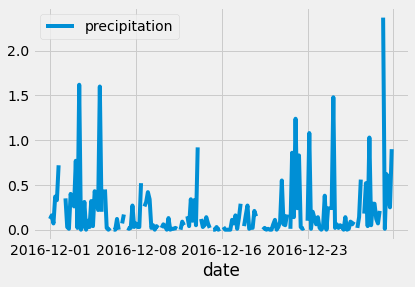

In [18]:
# calc month of December 2016
year = 2016
month = 12
num_days = calendar.monthrange(year, month)[1]
start_date = dt.date(year, month, 1)
end_date = dt.date(year, month, num_days)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
decem_df = pd.DataFrame(results, columns=['date', 'precipitation'])
decem_df.set_index(decem_df['date'], inplace=True)
# Sort the dataframe by date
decem_df = decem_df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
decem_df.plot()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
decem_df.describe()

,precipitation
count,178.000000
mean,0.199494
std,0.342967
min,0.000000
25%,0.020000
50%,0.060000
75%,0.247500
max,2.370000


In [20]:
Dresults = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= start_date, Measurement.date <= end_date).all()
print(Dresults)

[(74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), (65.0,), (68.0,), (62.0,), (75.0,), (70.0,), (69.0,), (76.0,), (76.0,), (74.0,), (73.0,), (71.0,), (74.0,), (74.0,), (72.0,), (71.0,), (72.0,), (74.0,), (69.0,), (67.0,)]


In [21]:
decemtemp_df = pd.DataFrame(Dresults, columns=['tobs'])
print(decemtemp_df)
decemtemp_df.describe()

    tobs
0   74.0
1   70.0
2   72.0
3   70.0
4   67.0
5   67.0
6   69.0
7   70.0
8   68.0
9   69.0
10  69.0
11  66.0
12  65.0
13  68.0
14  62.0
15  75.0
16  70.0
17  69.0
18  76.0
19  76.0
20  74.0
21  73.0
22  71.0
23  74.0
24  74.0
25  72.0
26  71.0
27  72.0
28  74.0
29  69.0
30  67.0


,tobs
count,31.000000
mean,70.419355
std,3.364265
min,62.000000
25%,68.500000
50%,70.000000
75%,73.500000
max,76.000000
